## EXERCICE 6 : PLS

inspire de http://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_compare_cross_decomposition.html


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression


### Partie 1 : regression PLS avec reponse univariee (PLS1)


In [2]:
#Generation de donnees
n = 1000
p = 10
X = np.random.normal(size=n * p).reshape((n, p))
y = X[:, 0] + 2 * X[:, 1] + 0.5 * X[:, 2]*X[:, 3] + np.random.normal(size=n) + 5


##### QUESTION 1: 
- Comment sont construites les donnees simulees ? 
- Que vous attendez-vous a voir dans la PLS


In [3]:

pls1 = PLSRegression(n_components=5)
pls1.fit(X, y)



PLSRegression(copy=True, max_iter=500, n_components=5, scale=True, tol=1e-06)

Les donnees sont principalement construites avec une relation lineaire entre X[:, 0:1] et Y. Il existe aussi un relation entre X[:, 2]*X[:, 3] et Y qui est moins forte. On s'attend alors a retrouver cette relation dans le 1er vecteur propre du projecteur de X.


#####QUESTION 2 : 
- Quelle est la signification de pls1.x_rotations_. 
- Comment l'interpretez vous ?
- Que renvoi de plus 'pls1.predict(X)' ? 
- Comparez ce resultat a y.


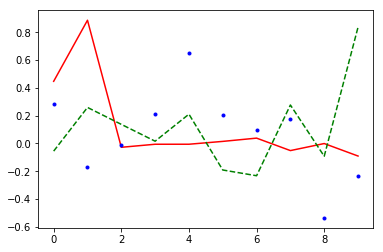

In [4]:

plt.plot(pls1.x_rotations_[:,0],'r-')
plt.plot(pls1.x_rotations_[:,1],'g--')
plt.plot(pls1.x_rotations_[:,2],'b.')
plt.show()


On remarque que  pls1.x_rotations donne l'ensemble des vecteurs de projection de X vers un espace de dimension inferieur avec :
- les vecteurs sont orthonormaux
- Ils maximisent la covariance avec les projections de Y 

Vu que la dimension des observations de sortie y est 1 ici,  pls1.y_rotations_ represente un seul vecteur propre en dimension 1 array([1.]). Nous n'avons en effet pas besoin de projeter Y !


pls1.predict(X) est la predicion de y à partir de X avec pls. On peut voir que la RMSE est faible compare a l'ecart type de Y :


In [5]:

RMSE=np.sqrt(np.mean(np.power(pls1.predict(X).reshape(-1)-y.reshape(-1),2.)))
print('RMSE: ',RMSE)
print('std(y): ',np.std(y))


RMSE:  1.0569224073508847
std(y):  2.5836890654559395


##### QUESTION 3: 
Est-ce qu'une regression lineaire multiple avec selection de modele conduirait a des resultats similaires ?



Réponse : oui car l'essentiel de la relation entre X et Y est lineaire et de plus liee au deux premieres variables de X seulement





### Partie 2 : regression PLS avec reponse multivariee (PLS2)


In [10]:
q = 3
p = 10
X = np.random.normal(size=n * p).reshape((n, p))
B = np.array([[1., 2.] + [0] * (p - 2)] * q)
B[1,0]/=2.
B[2,1]/=2.
Y = np.dot(X, B.transpose()) + np.random.normal(size=n * q).reshape((n, q))/2

n = 1000

pls2 = PLSRegression(n_components=5)
pls2.fit(X, Y)


PLSRegression(copy=True, max_iter=500, n_components=5, scale=True, tol=1e-06)

##### QUESTION 4: 
Comment sont construites les donnees simulees ? 


Réponse : La dimension des observations de sortie (dans Y) est 3 maintenant. Y depends des deux premieres variables de X  mais ses valeurs sur les dimensions 0, 1 et 2 sont liees a X suivant des relations legerement differentes 


##### QUESTION 5: 
- Predisez maintenant Y a l'aide de X. 
- Qu'observez vous.


In [11]:

Ypred=pls2.predict(X)

RMSE=np.sqrt(np.mean(np.power(Ypred[:,2]-Y[:,2],2.)))


print('RMSE: ',RMSE)
print('std(Y): ',np.std(Y))



RMSE:  0.4848130618383169
std(Y):  1.9900748528139847


On a bien predit une matrice de la taille de Y qui l'estime bien. Notons que cette estimation serait bien moins bonne si le bruit simule sur Y etait plus grand.
